In [1]:
import cv2
from pathlib import Path
import pandas as pd
import numpy as np
from skimage.draw import polygon
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')
import utils

In [2]:
# Example video path from your CSV
file_name = '0X1002E8FBACD08477.avi'
video_path = f'/home/paul/Downloads/EchoNet-Dynamic/Videos/' + file_name
video_tensor = utils.avi2video(video_path)
video_tensor.shape

(215, 112, 112)

In [3]:
# plt.imshow(video_tensor[50], cmap='gray')

In [4]:
# read the tracings csv and extract the correct file
path_tracings_csv = '/home/paul/Downloads/EchoNet-Dynamic/VolumeTracings.csv'
df_tracings = pd.read_csv(path_tracings_csv)


In [5]:
df_tracings.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


In [6]:
test_subject_tracings = df_tracings[df_tracings['FileName'] == '0X1002E8FBACD08477.avi']
test_subject_tracings.head()

,FileName,X1,Y1,X2,Y2,Frame
42,0X1002E8FBACD08477.avi,48.161458,20.635417,67.848958,70.401042,3
43,0X1002E8FBACD08477.avi,45.874610,23.086929,49.650993,21.592975,3
44,0X1002E8FBACD08477.avi,45.641497,26.272799,52.630064,23.508092,3
45,0X1002E8FBACD08477.avi,45.449515,29.442398,55.609134,25.423208,3
46,0X1002E8FBACD08477.avi,45.729173,32.425414,58.329093,27.440830,3


In [7]:
df_ed, df_es = utils.extract_ed_es_tracings(df_tracings, file_name)

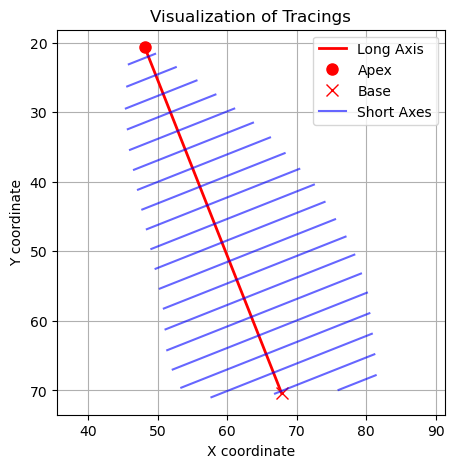

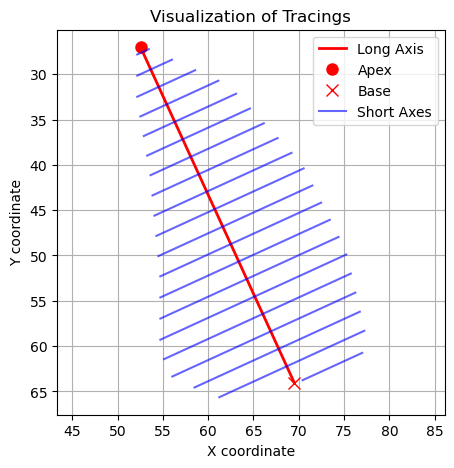

In [8]:
utils.plot_long_short_axis(df_ed)
utils.plot_long_short_axis(df_es)

In [9]:
mask_ed = utils.binary_mask_from_tracings(df_ed)
mask_es = utils.binary_mask_from_tracings(df_es)

In [10]:

traces_mask_ed = utils.extract_lv_axes(mask_ed)
traces_mask_es = utils.extract_lv_axes(mask_es)
# utils.plot_long_short_axis(traces_mask_ed)

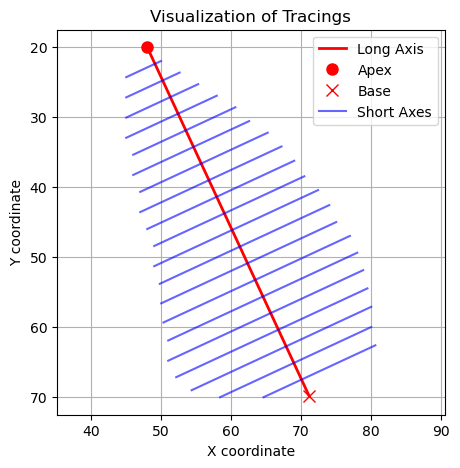

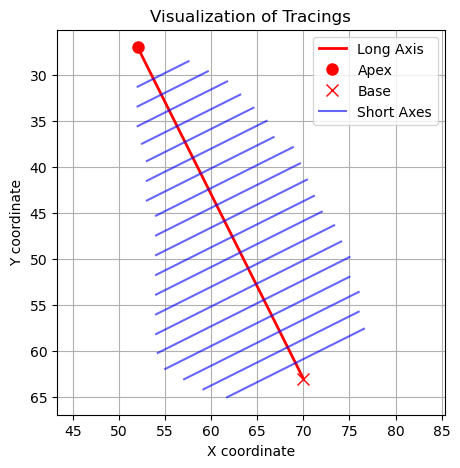

In [11]:
utils.plot_long_short_axis(traces_mask_ed)
utils.plot_long_short_axis(traces_mask_es)

In [12]:
# compare volume estimation and ejection fraction estimation 

## from the original 
vol_ed_orig = utils.calculate_volume_from_tracings(df_ed)
vol_es_orig = utils.calculate_volume_from_tracings(df_es)

# GT LVEF
lvef_gt = (vol_ed_orig - vol_es_orig) / vol_ed_orig



# from the masks 
vol_ed_mask = utils.calculate_volume_from_tracings(traces_mask_ed)
vol_es_mask = utils.calculate_volume_from_tracings(traces_mask_es)

# GT LVEF
lvef_mask = (vol_ed_mask - vol_es_mask) / vol_ed_mask

print('GT lvef:', lvef_gt)
print('Mask lvef:', lvef_mask)

GT lvef: 0.5779293280314683
Mask lvef: 0.5737428444404701
